# Super Bowl Television Ratings EDA

Link to Data: https://www.kaggle.com/datasets/mattop/super-bowl-television-ratings

### Necessary Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Read in and Prepare Data

In [16]:
df = pd.read_csv('super-bowl-ratings.csv')
df.insert(loc=3, column='year', value = pd.DatetimeIndex(df['date']).year)
df.insert(loc=6, column='average_viewers_mil', value = df.average_viewers/1000000)
df['cost_30_sec_100k'] = df.cost_of_30_second_ad_usd/100000
df['ad30sec_cost_view'] = df.cost_of_30_second_ad_usd / df.average_viewers 

In [17]:
df

,super_bowl,super_bowl_number,date,year,network,average_viewers,average_viewers_mil,total_viewers,household_rating,household_share,cost_of_30_second_ad_usd,cost_30_sec_100k,ad30sec_cost_view
0,I,1,1967-01-15,1967,NBC,24430000,24.43,35600000.0,18.5,36,37500,0.37500,0.001535
1,II,2,1968-01-14,1968,CBS,39120000,39.12,51300000.0,36.8,68,54500,0.54500,0.001393
2,III,3,1969-01-12,1969,NBC,41660000,41.66,54500000.0,36.0,70,55000,0.55000,0.001320
3,IV,4,1970-01-11,1970,CBS,44270000,44.27,59200000.0,39.4,69,78200,0.78200,0.001766
4,V,5,1971-01-17,1971,NBC,46040000,46.04,58500000.0,39.9,75,72500,0.72500,0.001575
5,VI,6,1972-01-16,1972,CBS,56640000,56.64,67300000.0,44.2,74,86100,0.86100,0.001520
6,VII,7,1973-01-14,1973,NBC,53320000,53.32,67700000.0,42.7,72,88100,0.88100,0.001652
7,VIII,8,1974-01-13,1974,CBS,51700000,51.70,63200000.0,41.6,73,103500,1.03500,0.002002
8,IX,9,1975-01-12,1975,NBC,56050000,56.05,71300000.0,42.4,72,107000,1.07000,0.001909
9,X,10,1976-01-18,1976,CBS,57710000,57.71,73300000.0,42.3,78,110000,1.10000,0.001906


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   super_bowl                55 non-null     object 
 1   super_bowl_number         55 non-null     int64  
 2   date                      55 non-null     object 
 3   year                      55 non-null     int64  
 4   network                   55 non-null     object 
 5   average_viewers           55 non-null     int64  
 6   average_viewers_mil       55 non-null     float64
 7   total_viewers             52 non-null     float64
 8   household_rating          55 non-null     float64
 9   household_share           55 non-null     int64  
 10  cost_of_30_second_ad_usd  55 non-null     int64  
 11  cost_30_sec_100k          55 non-null     float64
dtypes: float64(4), int64(5), object(3)
memory usage: 5.3+ KB


### Analyzing Based on Network

In [5]:
network_pivot = df.groupby(['network', 'year']).first()
display(network_pivot)

super_bowl  super_bowl_number        date  average_viewers  \
network year                                                              
ABC     1985        XIX                 19  1985-01-20         85530000   
        1988       XXII                 22  1988-01-31         80140000   
        1991        XXV                 25  1991-01-27         79510000   
        1995       XXIX                 29  1995-01-29         83420000   
        2000      XXXIV                 34  2000-01-30         88470000   
        2003     XXXVII                 37  2003-01-26         88640000   
        2006         XL                 40  2006-02-05         90750000   
CBS     1968         II                  2  1968-01-14         39120000   
        1970         IV                  4  1970-01-11         44270000   
        1972         VI                  6  1972-01-16         56640000   
        1974       VIII                  8  1974-01-13         51700000   
        1976          X                 10  1976-01-18         57710000   
        1978        XII                 12  1978-01-15         78940000   
        1980        XIV                 14  1980-01-20         76240000   
        1982        XVI                 16  1982-01-24         85240000   
        1984      XVIII                 18  1984-01-22         77620000   
        1987        XXI                 21  1987-01-25         87190000   
        1990       XXIV                 24  1990-01-28         73850000   
        1992       XXVI                 26  1992-01-26         79590000   
        2001       XXXV                 35  2001-01-28         84340000   
        2004    XXXVIII                 38  2004-02-01         89800000   
        2007        XLI                 41  2007-02-04         93180000   
        2010       XLIV                 44  2010-02-07        106480000   
        2013      XLVII                 47  2013-02-03        108690000   
        2016          L                 50  2016-02-07        111860000   
        2019       LIII                 53  2019-02-03         98480000   
        2021         LV                 55  2021-02-07         98200000   
Fox     1997       XXXI                 31  1997-01-26         87870000   
        1999     XXXIII                 33  1999-01-31         83720000   
        2002      XXXVI                 36  2002-02-03         86800000   
        2005      XXXIX                 39  2005-02-06         86070000   
        2008       XLII                 42  2008-02-03         97450000   
        2011        XLV                 45  2011-02-06        111040000   
        2014     XLVIII                 48  2014-02-02        112190000   
        2017         LI                 51  2017-02-05        111320000   
        2020        LIV                 54  2020-02-02        101320000   
NBC     1967          I                  1  1967-01-15         24430000   
        1969        III                  3  1969-01-12         41660000   
        1971          V                  5  1971-01-17         46040000   
        1973        VII                  7  1973-01-14         53320000   
        1975         IX                  9  1975-01-12         56050000   
        1977         XI                 11  1977-01-09         62050000   
        1979       XIII                 13  1979-01-21         74740000   
        1981         XV                 15  1981-01-25         68290000   
        1983       XVII                 17  1983-01-30         81770000   
        1986         XX                 20  1986-01-26         92570000   
        1989      XXIII                 23  1989-01-22         81590000   
        1993      XXVII                 27  1993-01-31         90990000   
        1994     XXVIII                 28  1994-01-30         90000000   
        1996        XXX                 30  1996-01-28         94080000   
        1998      XXXII                 32  1998-01-25         90000000   
        2009      XLIII               

In [6]:
df_abc = df[df.network=='ABC']
df_cbs = df[df.network=='CBS'] 
df_nbc = df[df.network=='NBC']
df_fox = df[df.network=='FOX']

In [7]:
labels=[]
data = []
for i in df.network.unique():
    labels.append(i)
    data.append(df[df.network==i].super_bowl.count())

network_counts = pd.DataFrame()
network_counts['network']=labels
network_counts['count']=data
network_counts = network_counts.sort_values('count', ascending=False).reset_index(drop=True)
display(network_counts)

,network,count
0,CBS,20
1,NBC,19
2,Fox,9
3,ABC,7


### Data Visualizations

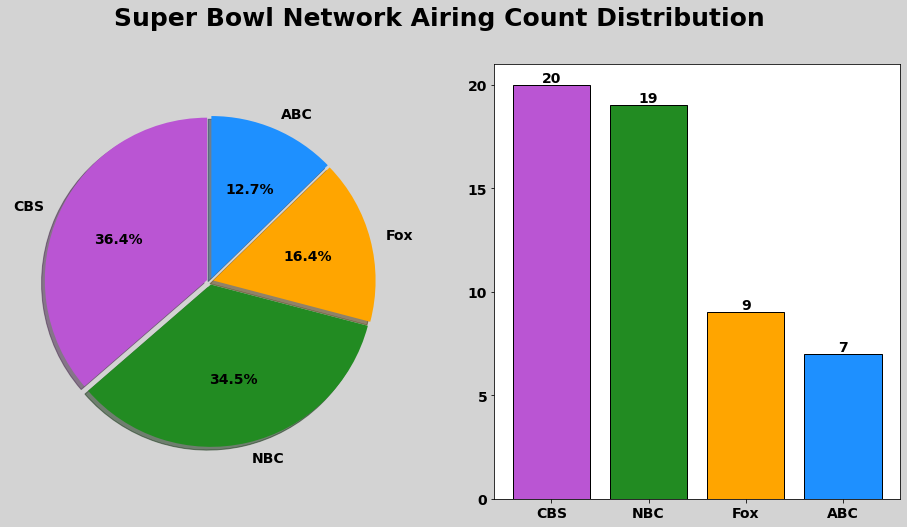

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
fig.set_facecolor('lightgrey')
plt.suptitle('Super Bowl Network Airing Count Distribution', fontsize=25, fontweight='bold')

explode=[.02,.02,.02,.02]

colors = ['mediumorchid', 'forestgreen', 'orange', 'dodgerblue']

ax[0].pie(network_counts['count'], 
          labels=network_counts['network'], 
          startangle=90, 
          autopct='%1.1f%%',
          explode=explode,
          shadow=True,
          colors=colors,
         textprops={'fontsize': 14, 'fontweight':'bold'})

ax[1].bar(network_counts['network'],
          network_counts['count'],
          color=colors,
         edgecolor='black')
ax[1].bar_label(ax[1].containers[0], fontsize=14, fontweight='bold')
ax[1].set_xticks([r for r in range(len(network_counts.network))], network_counts.network, size=14, fontweight='bold')
plt.yticks([i for i in range(0,25,5)],size=14, fontweight='bold')

plt.show()

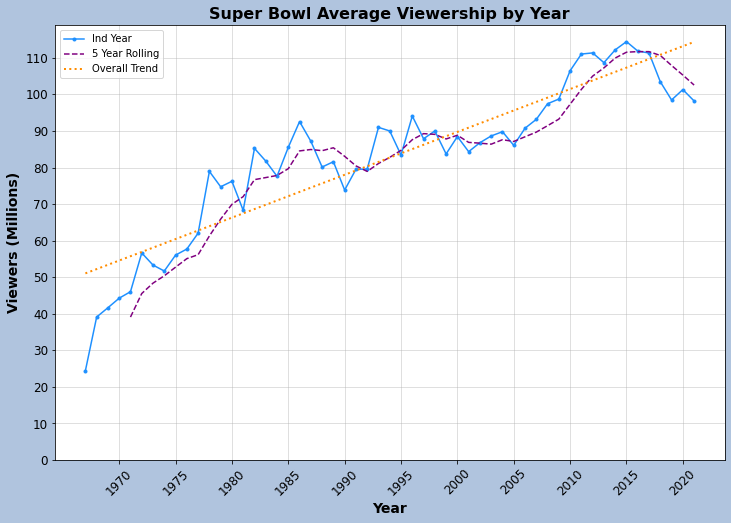

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_facecolor('lightsteelblue')

plt.rcParams["figure.figsize"] = (12,8)
plt.plot(df.index, df.average_viewers_mil, color='dodgerblue', linewidth=1.5, marker='.', label='Ind Year')

rolling_mean_5 = df.average_viewers_mil.rolling(5).mean()
plt.plot(df.index, rolling_mean_5, color="Purple", linestyle='dashed', alpha=1, label="5 Year Rolling")

z = np.polyfit(df.index, df.average_viewers_mil, 1)
p = np.poly1d(z)
plt.plot(df.index,p(df.index), linestyle='dotted',linewidth=2, color='darkorange', label='Overall Trend')

plt.title('Super Bowl Average Viewership by Year', fontweight='bold', fontsize=16)
plt.xlabel('Year', fontweight='bold', fontsize=14)
plt.ylabel('Viewers (Millions)', fontweight='bold', fontsize=14)

plt.xticks(df.index[(df["year"]==1965) | (df["year"] % 5 == 0)], df["year"][(df["year"]==1965) | (df["year"] % 5 == 0)], rotation=45, fontsize=12)
plt.yticks([i for i in range(0,120,10)], fontsize=12)

plt.legend(loc='best')
plt.grid(alpha=0.5)
plt.show()

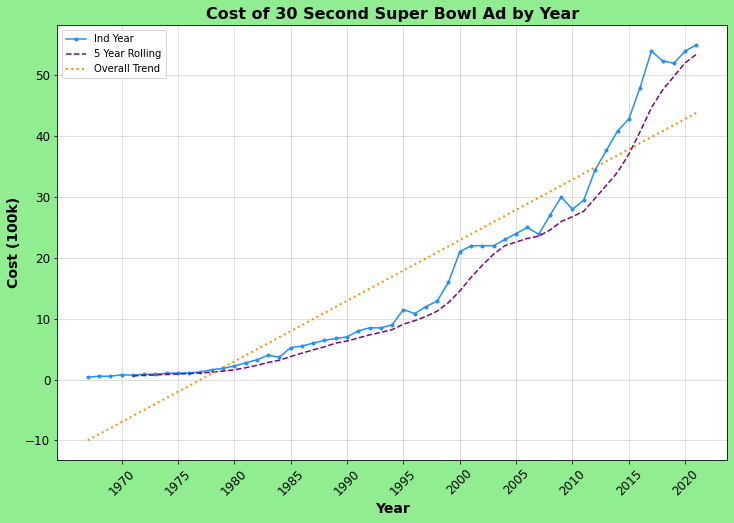

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_facecolor('lightgreen')

plt.rcParams["figure.figsize"] = (12,8)
plt.plot(df.index, df.cost_30_sec_100k, color='dodgerblue', linewidth=1.5, marker='.', label='Ind Year')

rolling_mean_5 = df.cost_30_sec_100k.rolling(5).mean()
plt.plot(df.index, rolling_mean_5, color="Purple", linestyle='dashed', alpha=1, label="5 Year Rolling")

z = np.polyfit(df.index, df.cost_30_sec_100k, 1)
p = np.poly1d(z)
plt.plot(df.index,p(df.index), linestyle='dotted',linewidth=2, color='darkorange', label='Overall Trend')

plt.title('Cost of 30 Second Super Bowl Ad by Year', fontweight='bold', fontsize=16)
plt.xlabel('Year', fontweight='bold', fontsize=14)
plt.ylabel('Cost (100k)', fontweight='bold', fontsize=14)

plt.xticks(df.index[(df["year"]==1970) | (df["year"] % 5 == 0)], df["year"][(df["year"]==1970) | (df["year"] % 5 == 0)], rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.legend(loc='best')
plt.grid(alpha=0.5)
plt.show()

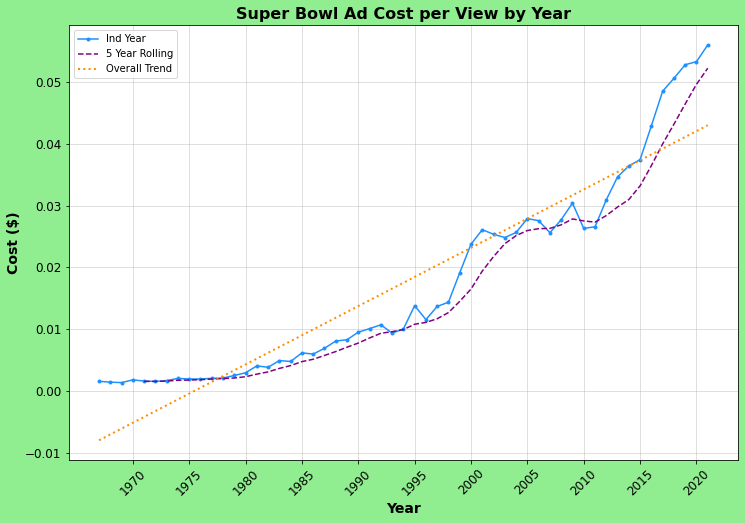

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_facecolor('lightgreen')

plt.rcParams["figure.figsize"] = (12,8)
plt.plot(df.index, df.ad30sec_cost_view, color='dodgerblue', linewidth=1.5, marker='.', label='Ind Year')

rolling_mean_5 = df.ad30sec_cost_view.rolling(5).mean()
plt.plot(df.index, rolling_mean_5, color="Purple", linestyle='dashed', alpha=1, label="5 Year Rolling")

z = np.polyfit(df.index, df.ad30sec_cost_view, 1)
p = np.poly1d(z)
plt.plot(df.index,p(df.index), linestyle='dotted',linewidth=2, color='darkorange', label='Overall Trend')

plt.title('Super Bowl Ad Cost per View by Year', fontweight='bold', fontsize=16)
plt.xlabel('Year', fontweight='bold', fontsize=14)
plt.ylabel('Cost ($)', fontweight='bold', fontsize=14)

plt.xticks(df.index[(df["year"]==1970) | (df["year"] % 5 == 0)], df["year"][(df["year"]==1970) | (df["year"] % 5 == 0)], rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.legend(loc='best')
plt.grid(alpha=0.5)
plt.show()

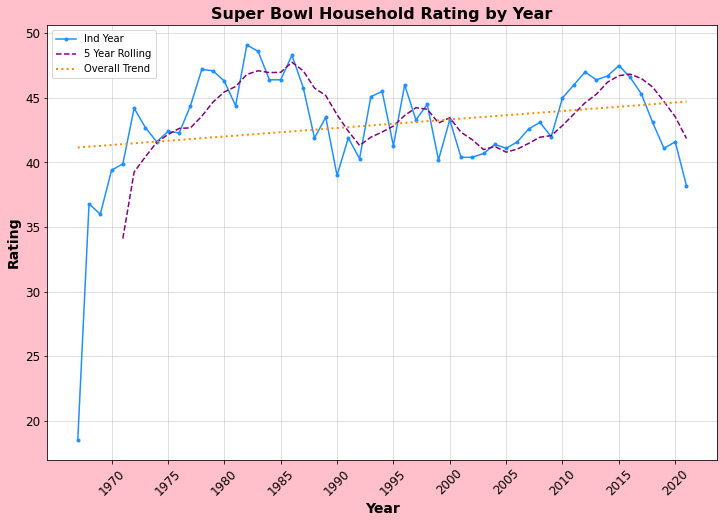

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_facecolor('pink')

plt.rcParams["figure.figsize"] = (12,8)
plt.plot(df.index, df.household_rating, color='dodgerblue', linewidth=1.5, marker='.', label='Ind Year')

rolling_mean_5 = df.household_rating.rolling(5).mean()
plt.plot(df.index, rolling_mean_5, color="Purple", linestyle='dashed', alpha=1, label="5 Year Rolling")

z = np.polyfit(df.index, df.household_rating, 1)
p = np.poly1d(z)
plt.plot(df.index,p(df.index), linestyle='dotted',linewidth=2, color='darkorange', label='Overall Trend')

plt.title('Super Bowl Household Rating by Year', fontweight='bold', fontsize=16)
plt.xlabel('Year', fontweight='bold', fontsize=14)
plt.ylabel('Rating', fontweight='bold', fontsize=14)

plt.xticks(df.index[(df["year"]==1970) | (df["year"] % 5 == 0)], df["year"][(df["year"]==1970) | (df["year"] % 5 == 0)], rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.legend(loc='best')
plt.grid(alpha=0.5)
plt.show()

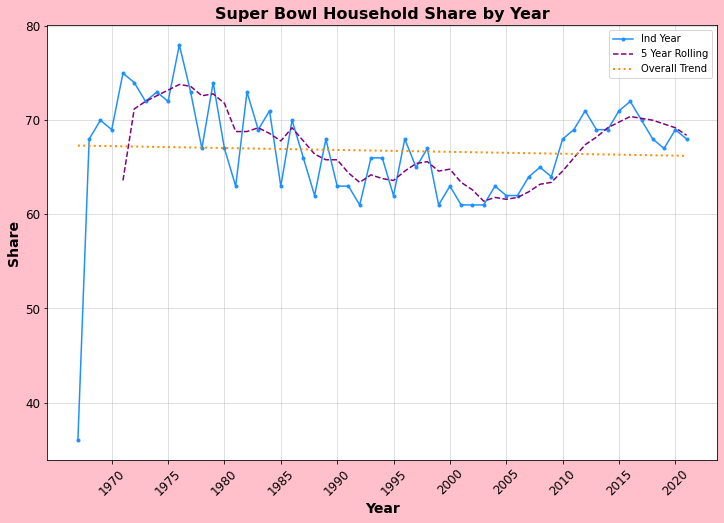

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_facecolor('pink')

plt.rcParams["figure.figsize"] = (12,8)
plt.plot(df.index, df.household_share, color='dodgerblue', linewidth=1.5, marker='.', label='Ind Year')

rolling_mean_5 = df.household_share.rolling(5).mean()
plt.plot(df.index, rolling_mean_5, color="Purple", linestyle='dashed', alpha=1, label="5 Year Rolling")

z = np.polyfit(df.index, df.household_share, 1)
p = np.poly1d(z)
plt.plot(df.index,p(df.index), linestyle='dotted',linewidth=2, color='darkorange', label='Overall Trend')

plt.title('Super Bowl Household Share by Year', fontweight='bold', fontsize=16)
plt.xlabel('Year', fontweight='bold', fontsize=14)
plt.ylabel('Share', fontweight='bold', fontsize=14)

plt.xticks(df.index[(df["year"]==1970) | (df["year"] % 5 == 0)], df["year"][(df["year"]==1970) | (df["year"] % 5 == 0)], rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.legend(loc='best')
plt.grid(alpha=0.5)
plt.show()

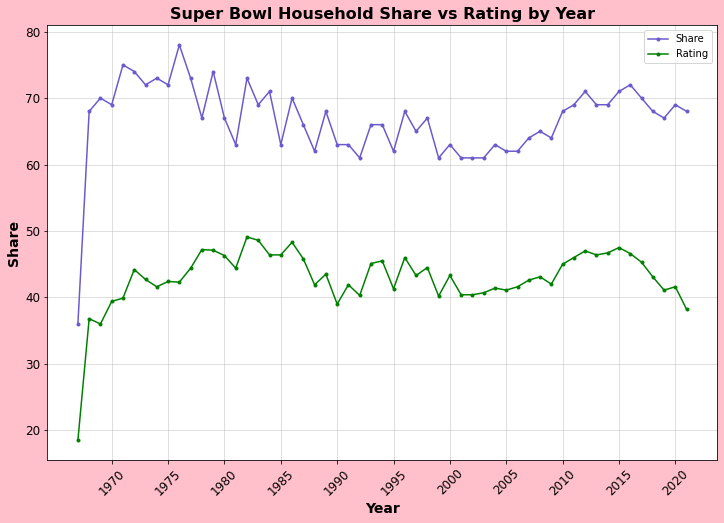

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_facecolor('pink')
plt.rcParams["figure.figsize"] = (12,8)

plt.plot(df.index, df.household_share, color='slateblue', linewidth=1.5, marker='.', label='Share')
plt.plot(df.index, df.household_rating, color='green', linewidth=1.5, marker='.', label='Rating')


plt.title('Super Bowl Household Share vs Rating by Year', fontweight='bold', fontsize=16)
plt.xlabel('Year', fontweight='bold', fontsize=14)
plt.ylabel('Share', fontweight='bold', fontsize=14)

plt.xticks(df.index[(df["year"]==1970) | (df["year"] % 5 == 0)], df["year"][(df["year"]==1970) | (df["year"] % 5 == 0)], rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.legend(loc='best')
plt.grid(alpha=0.5)
plt.show()